In [15]:
import mysql.connector
import pandas as pd
from tabulate import tabulate  
import matplotlib.pyplot as plt



In [16]:
connection = mysql.connector.connect(
    host = "127.0.0.1",
    user = "root",
    password = "database4471",
    database = "lung_cancer"
)

if connection.is_connected():
    print("mysql database is connected")




mysql database is connected


In [17]:
cursor = connection.cursor()
cursor.execute('SELECT * FROM cancer')

results = cursor.fetchall()

# Fetching column names
column_names = [desc[0] for desc in cursor.description]



In [19]:
# Converting the results into a Pandas DataFrames
df = pd.DataFrame(results, columns=column_names)

# Closing the cursor and connection
cursor.close()
connection.close()

# Limiting the DataFrame to the first 10 rows
df=df.head(10)

# Resetting the index to start from 1
df.index = df.index + 1

# Printing the DataFrame in a well-aligned table format using 'pipe'
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=True))

|    | GENDER   |   AGE |   SMOKING |   YELLOW_FINGERS |   ANXIETY |   PEER_PRESSURE |   CHRONIC DISEASE |   FATIGUE |   ALLERGY |   WHEEZING |   ALCOHOL CONSUMING |   COUGHING |   SHORTNESS OF BREATH |   SWALLOWING DIFFICULTY |   CHEST PAIN | LUNG_CANCER   |
|---:|:---------|------:|----------:|-----------------:|----------:|----------------:|------------------:|----------:|----------:|-----------:|--------------------:|-----------:|----------------------:|------------------------:|-------------:|:--------------|
|  1 | M        |    69 |         1 |                2 |         2 |               1 |                 1 |         2 |         1 |          2 |                   2 |          2 |                     2 |                       2 |            2 | YES           |
|  2 | M        |    74 |         2 |                1 |         1 |               1 |                 2 |         2 |         2 |          1 |                   1 |          1 |                     2 |                  

<Figure size 1000x600 with 0 Axes>

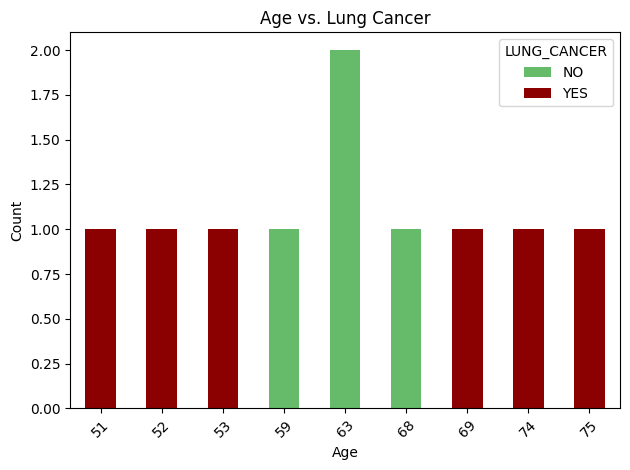

In [13]:
# Column and Bar chart for Age vs Lungs Cancer

plt.figure(figsize=(10, 6))
df.groupby('AGE')['LUNG_CANCER'].value_counts().unstack().plot(kind='bar', stacked=True, color=['#66BB6A', '#8B0000'])
plt.title('Age vs. Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="LUNG_CANCER", labels=["NO", "YES"])
plt.tight_layout()
plt.show()

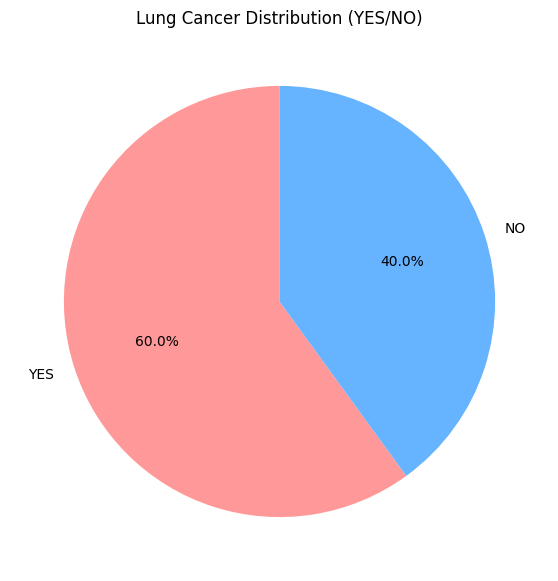

In [8]:
#Pie Chart for `LUNG_CANCER` distribution (YES/NO)
lung_cancer_counts = df['LUNG_CANCER'].value_counts()
plt.figure(figsize=(7, 7))
lung_cancer_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Lung Cancer Distribution (YES/NO)')
plt.ylabel('')
plt.show()

<Figure size 1000x600 with 0 Axes>

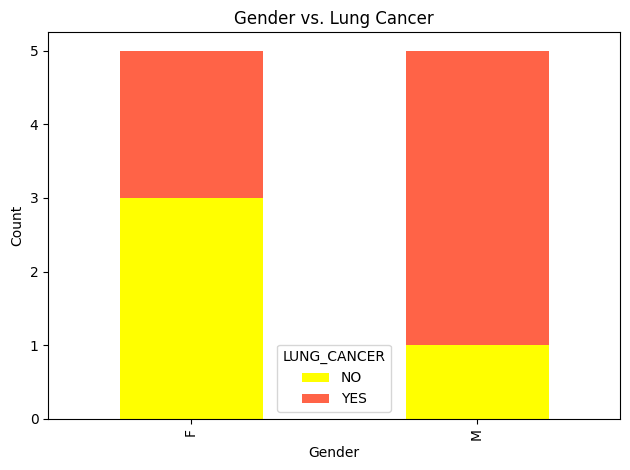

In [11]:
#  Stacked Bar Chart for `GENDER` vs `LUNG_CANCER`
plt.figure(figsize=(10, 6))
gender_lung_cancer = pd.crosstab(df['GENDER'], df['LUNG_CANCER'])
gender_lung_cancer.plot(kind='bar', stacked=True, color=['#FFFF00', '#FF6347'])
plt.title('Gender vs. Lung Cancer')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="LUNG_CANCER", labels=["NO", "YES"])
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

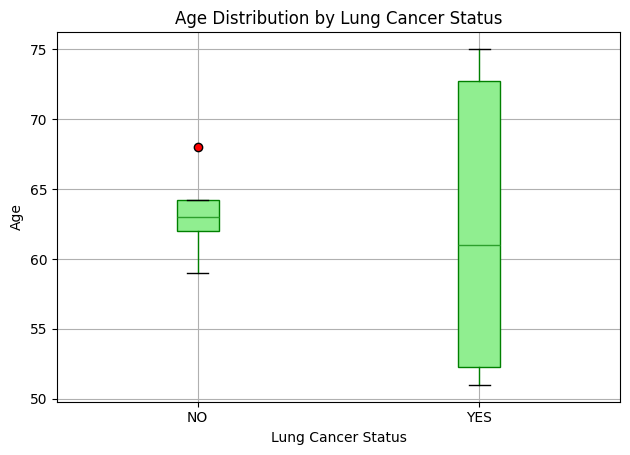

In [21]:

# boxplot Chart for Age Distribution by Lung Cancer Status

plt.figure(figsize=(10, 6))
df.histogram(column='AGE', by='LUNG_CANCER', patch_artist=True, 
           boxprops=dict(facecolor='lightgreen', color='green'), 
           whiskerprops=dict(color='green'), flierprops=dict(markerfacecolor='red'))
plt.title('Age Distribution by Lung Cancer Status')
plt.suptitle('')
plt.xlabel('Lung Cancer Status')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()

# Show all the plots
plt.show()